## Import Statements

In [ ]:
!pip install bertopic --q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
work_dir = '/content/drive/MyDrive/SP'

In [9]:
!python $work_dir/code/save_hist_news.py --start "2025-03-01" --end "2025-03-02"

Start Date is:  2025-03-01
End Date is:  2025-03-02
b'{"meta":{"found":19,"returned":3,"limit":3,"page":1},"data":[{"uuid":"ad4b5a0f-6fa6-4b0f-b85a-da4a5b'
b'{"meta":{"found":5,"returned":3,"limit":3,"page":1},"data":[{"uuid":"83a10716-dc32-406e-ae79-b902c56'
data/apple_news_20250301_20250302.jsonl
Traceback (most recent call last):
  File "/content/drive/MyDrive/SP/code/save_hist_news.py", line 82, in <module>
    main()
  File "/content/drive/MyDrive/SP/code/save_hist_news.py", line 75, in main
    with open(filepath, 'w') as f:
         ^^^^^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: 'data/apple_news_20250301_20250302.jsonl'


## Stock Historical News Sentiment Analysis

In [ ]:
def read_jsonl(filename):
  import json

  filepath = work_dir + '/data/' + filename
  json_list = []

  with open(filepath, 'r') as f:
      for line in f:
          try:
              json_obj = json.loads(line)
              json_list.append(json_obj)
          except json.JSONDecodeError as e:
              print(f"Error decoding JSON: {e}")
              # Handle the error as needed, e.g., skip the invalid line
  print(f'Number of days: {len(json_list)}')

  return json_list

def create_topic_df(description, topic_model, model_type:str):
  # description.reset_index(inplace=True, drop=True)
  # topic_df[['ID', 'Description']] = description_df[['ID', 'Description']].reset_index(drop=True)
  topic_label_id, topic_prob = topic_model.transform(description)
  topic_label = [topic_model.topic_labels_[i] for i in topic_label_id]
  topic_rep = [topic_model.get_topic_info().iloc[i]['Representation'] for i in topic_label_id]
  topic_df[model_type] = topic_rep
  print('Number of unique topics:', len(set(topic_label)))
  return topic_df

In [ ]:
import os

stock_news_dir = '/content/drive/MyDrive/MLOps/stock/data' # Replace with your directory
all_hist_news = []

for filename in os.listdir(stock_news_dir):
  if not filename.endswith('.jsonl'):
    continue
  print(filename)
  # filepath = os.path.join(stock_news_dir, filename)
  hist_news = read_jsonl(filename)
  all_hist_news.extend(hist_news)

apple_news_20241001_20241031.jsonl
Number of days: 31
apple_news_20240901_20240930.jsonl
Number of days: 30
apple_news_20240801_20240831.jsonl
Number of days: 31
apple_news_20240101_20240131.jsonl
Number of days: 31
apple_news_20240201_20240229.jsonl
Number of days: 29
apple_news_20241101_20241130.jsonl
Number of days: 30
apple_news_20240701_20240731.jsonl
Number of days: 31
apple_news_20240601_20240630.jsonl
Number of days: 30
apple_news_20240501_20240531.jsonl
Number of days: 31
apple_news_20240401_20240430.jsonl
Number of days: 30
apple_news_20240301_20240331.jsonl
Number of days: 31
apple_news_20241201_20241231.jsonl
Number of days: 31
apple_news_20231201_20231231.jsonl
Number of days: 31
apple_news_20231101_20231130.jsonl
Number of days: 30


In [ ]:
print(len(all_hist_news))

427


### Sentiment Analysis


In [ ]:
hist_news_df = pd.DataFrame(all_hist_news).sort_values(by='date')
print(hist_news_df.shape)

(427, 2)


In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/933 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
description = hist_news_df['content'].tolist()
sentiment = pipe(description)

In [ ]:
hist_news_df = pd.concat([hist_news_df, pd.DataFrame(sentiment)], axis=1)
hist_news_df['sentiment_flag'] = hist_news_df.apply(lambda x: 1 if x['label'] == 'positive' else (-1 if x['label'] == 'negative' else 0), axis=1)

## Stock Data

In [ ]:
import yfinance as yf

# Define the ticker symbol
ticker_symbol = "AAPL"

# Create a Ticker object
ticker = yf.Ticker(ticker_symbol)

# Fetch historical market data
data = ticker.history(period="1y")  # data for the last year
print("Historical Data:")
print(data)

# Fetch basic financials
financials = ticker.financials
print("\nFinancials:")
print(financials)

# Fetch stock actions like dividends and splits
actions = ticker.actions
print("\nStock Actions:")
print(actions)

Historical Data:
                                 Open        High         Low       Close  \
Date                                                                        
2024-01-02 00:00:00-05:00  186.237603  187.521323  182.993502  184.734970   
2024-01-03 00:00:00-05:00  183.321893  184.973804  182.535736  183.351746   
2024-01-04 00:00:00-05:00  181.261998  182.197418  179.998201  181.023178   
2024-01-05 00:00:00-05:00  181.102771  181.869006  179.291637  180.296707   
2024-01-08 00:00:00-05:00  181.202281  184.695178  180.615161  184.655365   
...                               ...         ...         ...         ...   
2024-12-24 00:00:00-05:00  255.490005  258.209991  255.289993  258.200012   
2024-12-26 00:00:00-05:00  258.190002  260.100006  257.630005  259.019989   
2024-12-27 00:00:00-05:00  257.829987  258.700012  253.059998  255.589996   
2024-12-30 00:00:00-05:00  252.229996  253.500000  250.750000  252.199997   
2024-12-31 00:00:00-05:00  252.440002  253.279999  249.4299

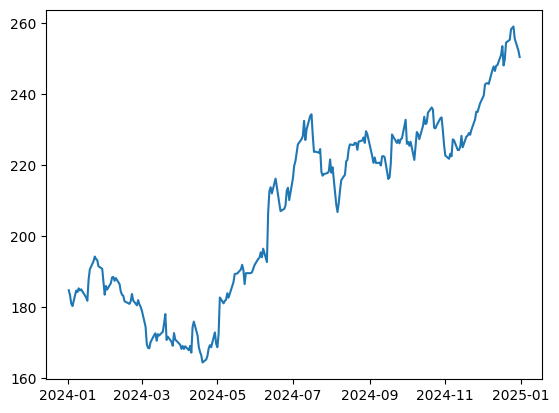

In [ ]:
plt.plot(data['Close'])

## Stock Data and Sentiment Correlation

In [ ]:
# Convert the 'date' column in both DataFrames to datetime objects if they are not already.
data['date'] = pd.to_datetime(data.index).strftime('%Y-%m-%d')
data['date_minus_1'] = (data.index + pd.Timedelta(days=-1)).strftime('%Y-%m-%d')

# Perform the merge operation
merged_df = pd.merge(data, hist_news_df, left_on='date_minus_1', right_on='date', how='inner')
merged_df['sentiment_score'] = merged_df['score'] * merged_df['sentiment_flag']


# Display the merged DataFrame
merged_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date_x,date_minus_1,date_y,content,label,score,sentiment_flag,sentiment_score
0,186.237603,187.521323,182.993502,184.734970,82488700,0.0,0.0,2024-01-02,2024-01-01,2024-01-01,Apple: A bite of reality in a volatile market;...,negative,0.979846,-1,-0.979846
1,183.321893,184.973804,182.535736,183.351746,58414500,0.0,0.0,2024-01-03,2024-01-02,2024-01-02,Apple Stock (NASDAQ:AAPL): Reality is Starting...,positive,0.999680,1,0.999680
2,181.261998,182.197418,179.998201,181.023178,71983600,0.0,0.0,2024-01-04,2024-01-03,2024-01-03,Is Apple Stock a Buy?; Apple Stock: Headed to ...,negative,0.997479,-1,-0.997479
3,181.102771,181.869006,179.291637,180.296707,62303300,0.0,0.0,2024-01-05,2024-01-04,2024-01-04,Better Tech Stock: Alphabet vs. Apple; Apple S...,positive,0.661932,1,0.661932
4,181.202281,184.695178,180.615161,184.655365,59144500,0.0,0.0,2024-01-08,2024-01-07,2024-01-07,"The Last Time Apple Spent This Much Money, It ...",positive,0.998974,1,0.998974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,255.490005,258.209991,255.289993,258.200012,23234700,0.0,0.0,2024-12-24,2024-12-23,2024-12-23,Apple Seen Having Strong Holiday Sales. Stock ...,negative,0.998423,-1,-0.998423
248,258.190002,260.100006,257.630005,259.019989,27237100,0.0,0.0,2024-12-26,2024-12-25,2024-12-25,Apple (AAPL) Stock Hits Record High Amid Marke...,positive,0.849709,1,0.849709
249,257.829987,258.700012,253.059998,255.589996,42355300,0.0,0.0,2024-12-27,2024-12-26,2024-12-26,Buffett’s Berkshire drastically cuts Apple sto...,positive,0.997469,1,0.997469
250,252.229996,253.500000,250.750000,252.199997,35557500,0.0,0.0,2024-12-30,2024-12-29,2024-12-29,Apple’s stock splits: When will AAPL shares sp...,positive,0.986604,1,0.986604


In [ ]:
# prompt: add a line to plotly fig

import plotly.graph_objects as go

# Assuming 'merged_df' is your DataFrame and you want to plot 'Close' vs 'sentiment_score'
fig = go.Figure()

fig.add_trace(go.Scatter(x=merged_df['date'], y=merged_df['Close'], mode='lines', name='Close Price'))
fig.add_trace(go.Scatter(x=merged_df['date'], y=merged_df['sentiment_score'], mode='lines', name='Sentiment Score'))

fig.update_layout(title='Stock Close Price and Sentiment Score',
                  xaxis_title='Date',
                  yaxis_title='Value')

fig.show()

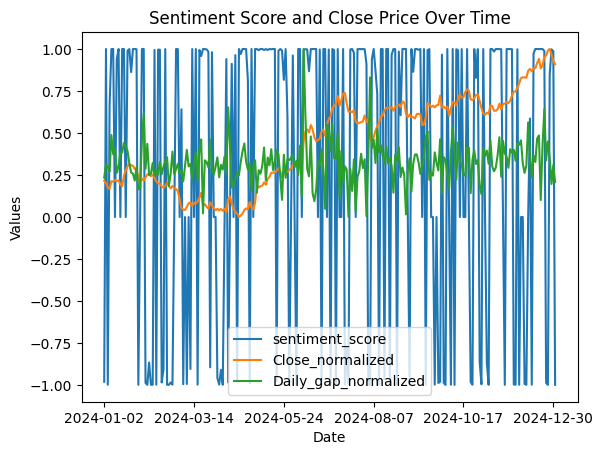

In [ ]:
# prompt: plot both score and close of merged_df in one time series chart

import matplotlib.pyplot as plt

# Normalize the 'Close' price
merged_df['Close_normalized'] = (merged_df['Close'] - merged_df['Close'].min()) / (merged_df['Close'].max() - merged_df['Close'].min())
merged_df['Daily_gap'] = merged_df['Close'] - merged_df['Open']
merged_df['Daily_gap_normalized'] = (merged_df['Daily_gap'] - merged_df['Daily_gap'].min()) / (merged_df['Daily_gap'].max() - merged_df['Daily_gap'].min())
merged_df.plot(x='date_x', y=['sentiment_score', 'Close_normalized', 'Daily_gap_normalized'], kind='line')

In [ ]:
# prompt: calculate moving average of multiple sentiment scores

import pandas as pd

def calculate_moving_average(sentiment_scores, window_size):
  """Calculates the moving average of sentiment scores.

  Args:
    sentiment_scores: A list or pandas Series of sentiment scores.
    window_size: The size of the moving average window.

  Returns:
    A pandas Series of the moving average sentiment scores.
    Returns None if the input is invalid or if the window_size is larger than the data.
  """
  if not isinstance(sentiment_scores, (list, pd.Series)):
    print("Error: sentiment_scores must be a list or pandas Series.")
    return None

  if window_size <= 0 or window_size > len(sentiment_scores):
    print("Error: Invalid window_size.")
    return None

  sentiment_scores_series = pd.Series(sentiment_scores)
  moving_average = sentiment_scores_series.rolling(window=window_size).mean()
  return moving_average



In [ ]:
merged_df['moving_average_25'] = calculate_moving_average(merged_df['sentiment_score'], window_size=25)
merged_df['moving_average_30'] = calculate_moving_average(merged_df['sentiment_score'], 30)

<Figure size 3000x1000 with 0 Axes>

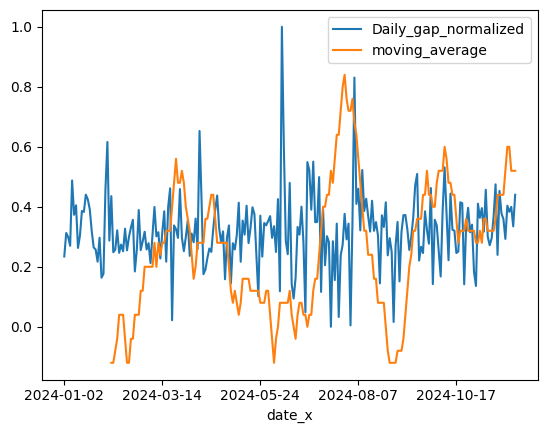

In [ ]:
plt.figure(figsize=(30, 10))
merged_df.plot(x='date_x', y=['Daily_gap_normalized', 'moving_average'], kind='line')
plt.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=merged_df['date_x'], y=merged_df['moving_average_30'], mode='lines', name='Sentiment Score 30'))
fig.add_trace(go.Scatter(x=merged_df['date_x'], y=merged_df['moving_average_25'], mode='lines', name='Sentiment Score 25'))

# fig.add_trace(go.Scatter(x=merged_df['date_x'], y=merged_df['Daily_gap_normalized'], mode='lines', name='Daily Gap'))
fig.add_trace(go.Scatter(x=merged_df['date_x'], y=merged_df['Close_normalized'], mode='lines', name='Close Normalized',
                         text=merged_df['content'],
                         hovertemplate="%{text}<br>Date: %{x}<br>Close Price: %{y}<extra></extra>")
)


fig.update_layout(
    title='Stock Close Price and Sentiment Score with Content',
    xaxis_title='Date',
    yaxis_title='Value',
    hovermode="x unified"
)

fig.update_traces(
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Rockwell"
    )
)

###
fig.show()

In [ ]:
merged_df['moving_average'].corr(merged_df['Close_normalized'])

0.2275566333383273

### Experiments

In [ ]:
# moving average windows range - 25 days

import pandas as pd

for window_size in range(1, 51):
  print(window_size)
  merged_df['moving_average'] = calculate_moving_average(merged_df['sentiment_score'], window_size)
  correlation = merged_df['moving_average'].corr(merged_df['Close_normalized'])
  print(f"Correlation between sentiment score and closing price: {correlation}")

1
Correlation between sentiment score and closing price: 0.13225265788838483
2
Correlation between sentiment score and closing price: 0.16460253736325864
3
Correlation between sentiment score and closing price: 0.17402115209469873
4
Correlation between sentiment score and closing price: 0.18803057981566818
5
Correlation between sentiment score and closing price: 0.196238177310369
6
Correlation between sentiment score and closing price: 0.20276988108243038
7
Correlation between sentiment score and closing price: 0.20673938490387656
8
Correlation between sentiment score and closing price: 0.20550665193102144
9
Correlation between sentiment score and closing price: 0.20790539213267287
10
Correlation between sentiment score and closing price: 0.20991225961345628
11
Correlation between sentiment score and closing price: 0.21173452637131981
12
Correlation between sentiment score and closing price: 0.21228853918720636
13
Correlation between sentiment score and closing price: 0.213125212782689

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,96,0_clooney and clooney squabble over whether to...,[clooney and clooney squabble over whether to ...,[Jon Watts Explains Demise Of George Clooney &...
1,1,96,1_how much would you earn if you sold apple st...,[how much would you earn if you sold apple sto...,[How Much Would It Take To Earn $100 A Month F...
2,2,64,2_us stocks are expected to start the year wit...,[us stocks are expected to start the year with...,[A Wall Street Analyst Who Correctly Predicted...
3,3,32,3_anker samsung galaxy note 5 black friday dea...,[anker samsung galaxy note 5 black friday deal...,[The 45 Black Friday tech deals worth shopping...
4,4,32,4_new iphone 16 spotted with a black and white...,[new iphone 16 spotted with a black and white ...,"[Apple Loop: iPhone 17 Design Leaks, iPhone 16..."
5,5,32,5_i need to make my home smarter just like app...,[i need to make my home smarter just like appl...,[Apple’s first smart display needs to make the...
6,6,32,6_why you should get an apple watch for 700 do...,[why you should get an apple watch for 700 dol...,[Why Spend $700 on an Apple Watch When You Can...
7,7,32,7_i hate it when companies beg and ask for my ...,[i hate it when companies beg and ask for my m...,[Apple fanatics beg company to recall trendy a...
8,8,32,8_nvidia 's jones keeps chip prices cool in ne...,[nvidia 's jones keeps chip prices cool in new...,[Dow Jones Futures: Stay Cool In Hot Market; F...
9,9,32,9_phil warren has been a favorite of many inve...,[phil warren has been a favorite of many inves...,[Warren Buffett Just Shunned His Favorite Stoc...


## Stock Recent News

In [ ]:
from bs4 import BeautifulSoup
import requests
import yfinance as yf
import re

# Script to scrap top5 google news for given company name
def google_query(search_term):
    if "news" not in search_term:
        search_term=search_term + 'news'
    url=f"https://www.google.com/search?q={search_term}"
    url=re.sub(r"\s","+",url)
    return url

def get_recent_stock_news(company_name):
    # time.sleep(4) #To avoid rate limit error
    headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

    g_query=google_query(company_name)
    res=requests.get(g_query,headers=headers).text
    soup=BeautifulSoup(res,"html.parser")
    news=[]
    for n in soup.find_all("div","n0jPhd ynAwRc tNxQIb nDgy9d"):
        news.append(n.text)
    for n in soup.find_all("div","IJl0Z"):
        news.append(n.text)

    if len(news)>20:
        news=news[:20]
    else:
        news=news
    news_string=""
    for i,n in enumerate(news):
        news_string+=f"{i}. {n}\n"
    # top5_new += news_string

    return news_string


In [ ]:
appl_news = get_recent_stock_news("APPL")
apple_news = get_recent_stock_news("APPLE")
apple_prod_news = get_recent_stock_news("APPLE Product")
apple_recent_news = get_recent_stock_news("APPLE Recent")
apple_stock_news = get_recent_stock_news("APPLE Stock")

In [ ]:
apple_prod_news

'0. These Apple products are getting upgraded soon, so it’s either the best or \nworst time to buy\n1. The best Apple Black Friday deals we found on Apple Watch, iPads, AirTags\n2. The 30+ best Black Friday Apple deals 2024: Early sales available now\n3. AirPods Max have a unique status among Apple products, and it’s not a good \none\n'

In [ ]:
!pip install nltk

# Download required NLTK data
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
news_list =apple_news + appl_news + apple_prod_news + apple_recent_news + apple_recent_news
for i in range(0, 2):
  news_list += news_list

In [ ]:
news_list

'0. Here’s everything coming from Apple this December, and what not to expect\n1. Apple begins selling News ads directly\n2. These Apple products are getting upgraded soon, so it’s either the best or \nworst time to buy\n3. Apple explains why you should never swipe apps closed on an iPhone\n0. Here’s everything coming from Apple this December, and what not to expect\n1. Apple begins selling News ads directly\n2. These Apple products are getting upgraded soon, so it’s either the best or \nworst time to buy\n3. Apple explains why you should never swipe apps closed on an iPhone\n0. These Apple products are getting upgraded soon, so it’s either the best or \nworst time to buy\n1. Apple Black Friday Deals 2024: iPads, MacBooks and More\n2. The best Apple Black Friday deals we found on Apple Watch, iPads, AirTags\n0. [News] 8 Rumored Features of the Apple iPhone 17 Pro\n1. These Apple products are getting upgraded soon, so it’s either the best or \nworst time to buy\n2. Apple Black Friday De

In [ ]:
# prompt: generate top topics from apple news

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import yfinance as yf
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

# ## Import Statements
# ## Stock News

def get_top_topics(news_list, num_topics=5):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    all_words = []

    for news in news_list:
        words = word_tokenize(news)
        words = [lemmatizer.lemmatize(w.lower()) for w in words if w.isalnum() and w.lower() not in stop_words]
        all_words.extend(words)

    word_counts = Counter(all_words)

    return word_counts.most_common(num_topics)

apple_news = get_recent_stock_news("APPLE")
top_topics = get_top_topics(apple_news)

print("Top Topics:")
for topic, count in top_topics:
    print(f"- {topic}: {count}")

Top Topics:
- apple: 9
- wolf: 3
- sequel: 3
- longer: 2
- trusted: 2


In [ ]:
from bertopic import BERTopic
from umap import UMAP
from hdbscan import HDBSCAN

hdbscan_model = HDBSCAN(min_cluster_size=50, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
umap_model = UMAP(n_neighbors=3, n_components=5, min_dist=0.0, metric='cosine', random_state=42)

In [ ]:
from bertopic.representation import KeyBERTInspired
from bertopic.representation import TextGeneration
from transformers import pipeline

kw_rep_model = KeyBERTInspired()

generator = pipeline('text2text-generation', model='google/flan-t5-large')
prompt = """
I have a topic that contains that contains the following documents:
[DOCUMENTS]
The topic is described by the following keywords: '[KEYWORDS]'.
Based on the information about the topic above, please create a short label of this topic, e.g. positive, warning, shocked.
Make sure you to only return the label and nothing more.
"""

llm_rep_model = TextGeneration(generator, prompt=prompt)

In [ ]:
from bertopic import BERTopic

# Assuming 'news_list' contains the text data for topic modeling
topic_model = BERTopic(
    embedding_model="all-MiniLM-L6-v2",
    umap_model=umap_model,
    language="english",
    calculate_probabilities=True,
    representation_model=llm_rep_model,
    nr_topics=10,
    verbose=True)
topics, probs = topic_model.fit_transform(news_list)

2024-11-24 00:08:11,835 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/15 [00:00<?, ?it/s]

2024-11-24 00:08:20,715 - BERTopic - Embedding - Completed ✓
2024-11-24 00:08:20,717 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-24 00:08:21,845 - BERTopic - Dimensionality - Completed ✓
2024-11-24 00:08:21,848 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-24 00:08:21,899 - BERTopic - Cluster - Completed ✓
2024-11-24 00:08:21,901 - BERTopic - Representation - Extracting topics from clusters using representation models.
100%|██████████| 15/15 [00:21<00:00,  1.43s/it]
2024-11-24 00:08:43,366 - BERTopic - Representation - Completed ✓
2024-11-24 00:08:43,369 - BERTopic - Topic reduction - Reducing number of topics
100%|██████████| 10/10 [00:09<00:00,  1.01it/s]
2024-11-24 00:08:53,343 - BERTopic - Topic reduction - Reduced number of topics from 15 to 10


In [ ]:
topic_model.update_topics(news_list, representation_model=llm_rep_model)

100%|██████████| 10/10 [01:27<00:00,  8.75s/it]


In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,96,0_director jon watts says he stabbed clooney a...,[director jon watts says he stabbed clooney an...,[Jon Watts Explains Demise Of George Clooney &...
1,1,96,1_how much would it take to earn 100 a month f...,[how much would it take to earn 100 a month fr...,[How Much Would It Take To Earn $100 A Month F...
2,2,64,2_a wall street analyst who correctly predicte...,[a wall street analyst who correctly predicted...,[A Wall Street Analyst Who Correctly Predicted...
3,3,32,3_45 Black Friday tech deals worth shopping fr...,[45 Black Friday tech deals worth shopping fro...,[The 45 Black Friday tech deals worth shopping...
4,4,32,"4_Apple Loop: iPhone 17 Design Leaks, iPhone 1...","[Apple Loop: iPhone 17 Design Leaks, iPhone 16...","[Apple Loop: iPhone 17 Design Leaks, iPhone 16..."
5,5,32,5_Apple’s first smart display needs to make th...,[Apple’s first smart display needs to make the...,[Apple’s first smart display needs to make the...
6,6,32,6_Why Spend $700 on an Apple Watch When You Ca...,[Why Spend $700 on an Apple Watch When You Can...,[Why Spend $700 on an Apple Watch When You Can...
7,7,32,7_Apple fanatics beg company to recall trendy ...,[Apple fanatics beg company to recall trendy a...,[Apple fanatics beg company to recall trendy a...
8,8,32,8_dow futures: stay cool in hot market; forget...,[dow futures: stay cool in hot market; forget ...,[Dow Jones Futures: Stay Cool In Hot Market; F...
9,9,32,9_Warren Buffett just shunned his favorite sto...,[Warren Buffett just shunned his favorite stoc...,[Warren Buffett Just Shunned His Favorite Stoc...


### Topic Clustering

In [ ]:
# from umap import UMAP
# from bertopic.representation import KeyBERTInspired
# from hdbscan import HDBSCAN
# from sklearn.cluster import KMeans

# umap_model = UMAP(n_neighbors=2, n_components=2, min_dist=0, metric='cosine', random_state=42)
# hdbscan_model = HDBSCAN(
#     min_cluster_size=2,
#     metric='euclidean',
#     cluster_selection_method='eom',
#     prediction_data=True,
# )

# from sentence_transformers import SentenceTransformer
# embedding_model = SentenceTransformer("BAAI/bge-base-en-v1.5")

# from transformers import pipeline
# from bertopic.representation import TextGeneration

# prompt = "I have a topic described by the following keywords: [KEYWORDS]. Based on the previous keywords, what is this topic about?"

# generator = pipeline('text2text-generation', model='google/flan-t5-base')
# text2text_rep_model = TextGeneration(generator)
# text2text_prompt_rep_model = TextGeneration(generator, prompt=prompt)


# from bertopic import BERTopic
# topic_model_hdbscan_3 = BERTopic(
#     umap_model=umap_model,
#     embedding_model=embedding_model,
#     # min_topic_size=20,
#     nr_topics=3,
#     hdbscan_model=hdbscan_model,
#     representation_model=KeyBERTInspired(random_state=24),
# )


# topic_model_hdbscan_100 = BERTopic(
#     umap_model=umap_model,
#     embedding_model=embedding_model,
#     # min_topic_size=20,
#     nr_topics=100,
#     hdbscan_model=hdbscan_model,
#     representation_model=KeyBERTInspired(random_state=24),
# )

# topic_model_kmeans_100 = BERTopic(
#     umap_model=umap_model,
#     embedding_model=embedding_model,
#     # min_topic_size=20,
#     nr_topics=100,
#     hdbscan_model=KMeans(n_clusters=100),
#     representation_model=KeyBERTInspired(random_state=24),
# )

# topic_model_kmeans_200 = BERTopic(
#     umap_model=umap_model,
#     embedding_model=embedding_model,
#     # min_topic_size=20,
#     nr_topics=200,
#     hdbscan_model=KMeans(n_clusters=200),
#     representation_model=KeyBERTInspired(random_state=24),
# )

# topic_model_kmeans_20 = BERTopic(
#     umap_model=umap_model,
#     embedding_model=embedding_model,
#     # min_topic_size=20,
#     nr_topics=20,
#     hdbscan_model=KMeans(n_clusters=20),
#     representation_model=KeyBERTInspired(random_state=24),
# )


In [ ]:
hist_news_df = pd.DataFrame(all_hist_news).sort_values(by='date')
print(hist_news_df.shape)

(335, 2)


In [ ]:
# topic_models = [
#     topic_model_hdbscan_3, topic_model_hdbscan_100,
#     # topic_model_kmeans_20, topic_model_kmeans_100, topic_model_kmeans_200
# ]
# topic_models_name = [
#     "hdbscan_20", "hdbscan_100",
#     # "kmeans_20", "kmeans_100", "kmeans_200"
# ]

In [ ]:
# hist_news_df

,date,content,hdbscan_20,hdbscan_100
0,2024-11-20,Bernstein sees Apple stock rising to $290 in b...,"[stocks, apple, buffett, investing, stock, nas...","[stocks, apple, buffett, investing, stock, nas..."
1,2024-11-21,Apple Stock In 2025: A Prediction On Where It'...,"[stocks, apple, buffett, investing, stock, nas...","[stocks, apple, buffett, investing, stock, nas..."
2,2024-11-22,"Buffett’s Berkshire bet on Apple, Coca-Cola; M...","[stocks, apple, buffett, investing, stock, nas...","[stocks, apple, buffett, investing, stock, nas..."
3,2024-11-23,1 Unstoppable Growth Stock That Could Join Nvi...,"[stocks, apple, buffett, investing, stock, nas...","[stocks, apple, buffett, investing, stock, nas..."
4,2024-11-24,Warren Buffett Keeps Dumping Apple Shares: Her...,"[stocks, apple, buffett, investing, stock, nas...","[stocks, apple, buffett, investing, stock, nas..."


In [ ]:
description = hist_news_df['description']

In [ ]:
topic_df = hist_news_df
for i, model in enumerate(topic_models):
    topic_model = model.fit(description)
    model_name = topic_models_name[i]
    print(f'Finished: {model_name}')
    print(model.get_topic_info()[:3])
    topic_df = create_topic_df(description, topic_model, model_name)

Finished: hdbscan_20
   Topic  Count                               Name  \
0     -1      5  -1_stocks_apple_buffett_investing   

                                      Representation  \
0  [stocks, apple, buffett, investing, stock, nas...   

                                 Representative_Docs  
0  [Apple Stock In 2025: A Prediction On Where It...  
Number of unique topics: 1
Finished: hdbscan_100
   Topic  Count                               Name  \
0     -1      5  -1_stocks_apple_buffett_investing   

                                      Representation  \
0  [stocks, apple, buffett, investing, stock, nas...   

                                 Representative_Docs  
0  [Apple Stock In 2025: A Prediction On Where It...  
Number of unique topics: 1


ValueError: n_samples=5 should be >= n_clusters=20.